In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle

In [48]:
calories = pd.read_csv("calories.csv")

In [49]:
exercise = pd.read_csv("exercise.csv")

In [50]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [51]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [52]:
data = pd.merge(calories, exercise, on = 'User_ID')

In [53]:
data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [54]:
data.shape

(15000, 9)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [56]:
data.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [57]:
data.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [58]:
data.duplicated().any()

np.False_

In [59]:
encoder = LabelEncoder()
data['Gender_encoded'] = encoder.fit_transform(data['Gender'])

<Axes: xlabel='Gender', ylabel='count'>

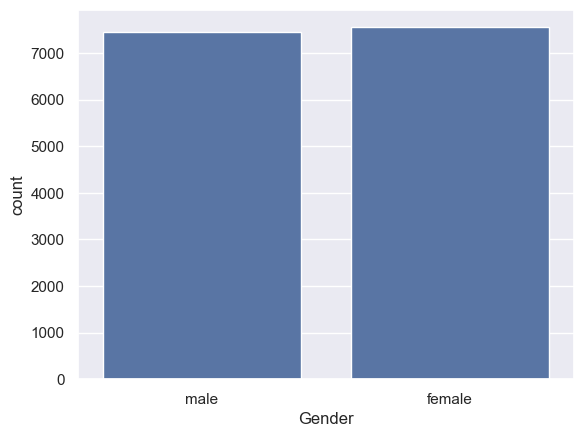

In [65]:
sns.set()
sns.countplot(x='Gender', data=data)

<Axes: xlabel='Age', ylabel='Count'>

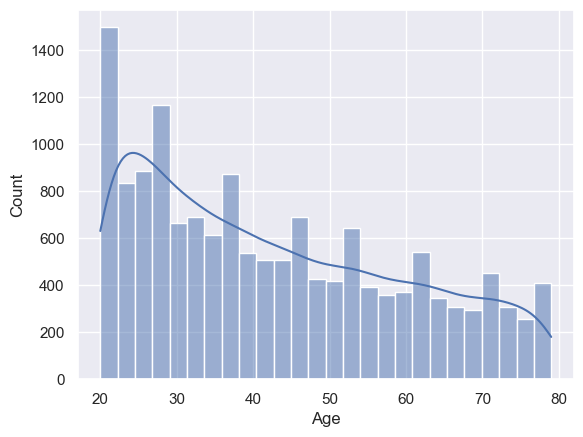

In [66]:
sns.histplot(data['Age'], kde=True)

<Axes: xlabel='Height', ylabel='Count'>

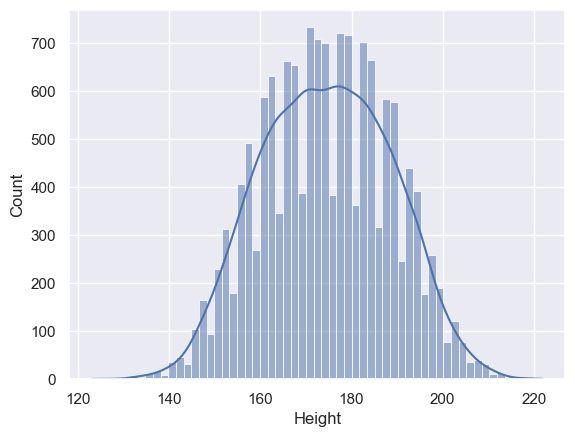

In [67]:
sns.histplot(data['Height'], kde=True)

C:\Users\pastr\AppData\Local\Temp\ipykernel_14704\2799343561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

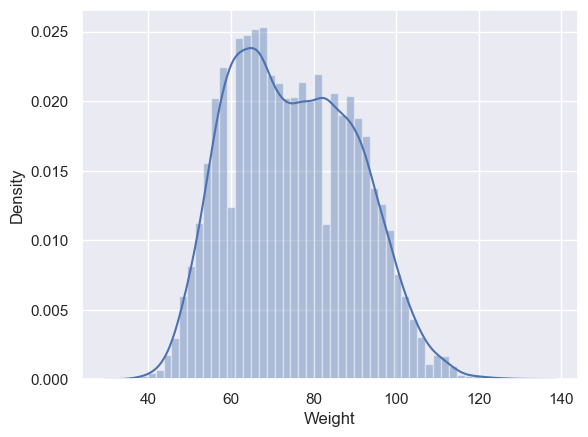

In [63]:
sns.distplot(data['Weight'])

<Axes: xlabel='Weight', ylabel='Count'>

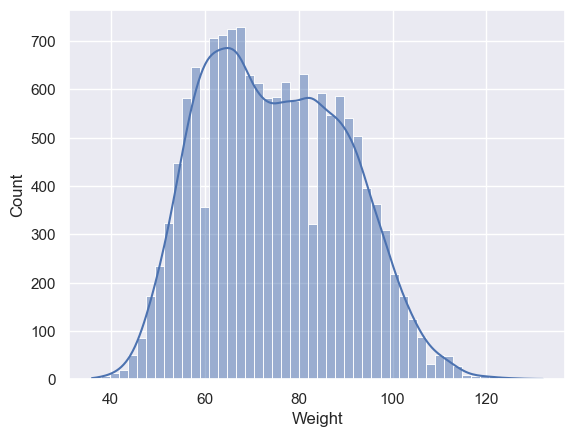

In [68]:
sns.histplot(data['Weight'], kde=True)

In [69]:
correlation = data.select_dtypes(include=['number']).corr()
correlation

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_encoded
User_ID,1.000000,-0.001661,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.000687
Calories,-0.001661,1.000000,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,0.022357
Age,-0.001827,0.154395,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.003222
Height,-0.013520,0.017537,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.710534
Weight,-0.011603,0.035481,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.783186
Duration,-0.002751,0.955421,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.003440
Heart_Rate,-0.000457,0.897882,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.011555
Body_Temp,0.000923,0.824558,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.007264
Gender_encoded,-0.000687,0.022357,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,1.000000


<Axes: >

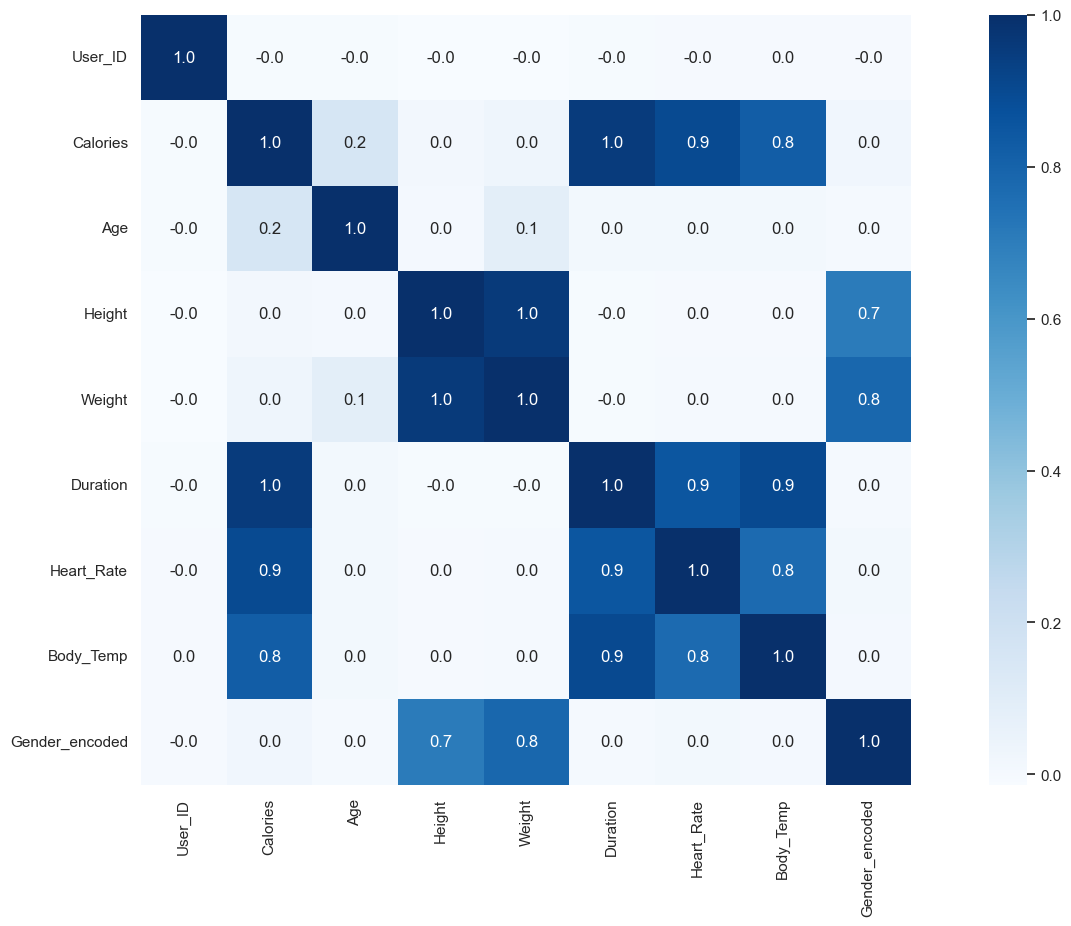

In [70]:
plt.figure(figsize = (20, 10))
sns.heatmap(correlation, cbar = True, square=True, fmt = ".1f", annot=True, cmap = 'Blues')

In [71]:
X  = data.drop(columns  = ['User_ID', 'Calories'])
y = data['Calories']

In [72]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [73]:
data.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Gender_encoded'],
      dtype='object')

In [74]:
preprocessor = ColumnTransformer(transformers=[
    ('ordinal', OrdinalEncoder(), ['Gender']),
    ('num', StandardScaler(), ['Age', 'Height', 'Weight', 'Duration','Heart_Rate', 'Body_Temp'])
], remainder='passthrough')

In [75]:
pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('model', XGBRegressor())]
)

In [76]:
pipeline.fit(X_train, y_train)

C:\Users\pastr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [77]:
y_pred = pipeline.predict(X_test)

In [78]:
r2_score(y_test, y_pred)

0.9988678909361673

In [79]:
mean_absolute_error(y_test, y_pred)

1.4981198125282924

In [80]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(pipeline, X, y, cv = kfold, scoring = 'r2')

In [81]:
cv_results.mean()

np.float64(0.9988510864545181)

In [82]:
with open('pipeline_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)